
## LPA - Prática - Aula 23 - 4.3 Resolução do exercício
---

## Parte 1 - Importação das bibliotecas

In [27]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

---
## Parte 2 - Importação das dos dados

In [77]:
# Função read_csv para importar os dados da pasta do computador
dados = pd.read_csv('dados_salarial_funcionarios.csv')

In [78]:
# Listando o nome das colunas
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento'],
      dtype='object')

In [79]:
# Imprimindo as 5 primeiras linhas
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,02/01/21
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,06/04/21
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,15/04/23
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,04/06/21
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,22/03/23


In [80]:
# Observando número de linhas e colunas
dados.shape

(1385, 10)

Resumo dos dados: 1385 linhas e 10 colunas (variáveis)

---
## Parte 3: Análise Exploratória dos Dados (AED)

#### Ter uma primeira visão sobre os dados e extrair os primeiros insights

In [81]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados.dtypes

Idade                       int64
Genero                     object
Nivel Ensino               object
Area Formacao              object
Setor                      object
Nivel                      object
Faixa Salarial             object
Anos experiencia           object
Faixa Salarial – numero     int64
Data ultimo aumento        object
dtype: object

In [82]:
# Coluna Data ultimo aumento está como varivável de texto. É preciso transformá-la para data
# Função to_datetime do Pandas
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])

In [83]:
# Verificando a alteração
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22


In [84]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [85]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,Idade,Faixa Salarial – numero,Data ultimo aumento
count,1385.000000,1385.000000,1385
mean,30.779783,9992.779783,2022-06-15 08:25:17.978339328
min,18.000000,1000.000000,2021-01-01 00:00:00
25%,26.000000,6000.000000,2021-09-19 00:00:00
50%,29.000000,8000.000000,2022-06-09 00:00:00
75%,34.000000,12000.000000,2023-03-05 00:00:00
max,54.000000,45000.000000,2023-12-28 00:00:00
std,6.869018,7353.675097,NaN


In [86]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia
count,1385,1385,1361,1385,1385,1385,1385
unique,2,6,9,23,4,13,6
top,Masculino,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos
freq,979,495,588,372,440,295,314


In [87]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

Idade                      False
Genero                     False
Nivel Ensino               False
Area Formacao               True
Setor                      False
Nivel                      False
Faixa Salarial             False
Anos experiencia           False
Faixa Salarial – numero    False
Data ultimo aumento        False
dtype: bool

In [88]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

Idade                       0
Genero                      0
Nivel Ensino                0
Area Formacao              24
Setor                       0
Nivel                       0
Faixa Salarial              0
Anos experiencia            0
Faixa Salarial – numero     0
Data ultimo aumento         0
dtype: int64

In [89]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [90]:
# Ou então, podemos excluir a coluna com valor faltante, se não for relevante para a análise (atenção ao fazer isso)
dados.drop('Area Formacao', axis=1, inplace=True)

## axis = 1 - sentido da coluna; axis = 2 - sentido das linhas

In [91]:
# Depois das correções, verificando se ainda há valores faltantes
dados.isna().sum()

Idade                      0
Genero                     0
Nivel Ensino               0
Setor                      0
Nivel                      0
Faixa Salarial             0
Anos experiencia           0
Faixa Salarial – numero    0
Data ultimo aumento        0
dtype: int64

In [92]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

0

In [93]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [94]:
# nº de linhas e colunas após mudanças. Caso houvesse dados duplicados, o número de linhas seria reduzido
dados.shape

(1385, 9)

In [95]:
# Contagem de valores por categoria de 'Nivel'
dados['Nivel'].value_counts()

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64

In [96]:
# Contagem de valores por categoria de 'Faixa Salarial'
dados['Faixa Salarial'].value_counts()

Faixa Salarial
de R$ 8.001/mês a R$ 12.000/mês     295
de R$ 6.001/mês a R$ 8.000/mês      255
de R$ 4.001/mês a R$ 6.000/mês      242
de R$ 12.001/mês a R$ 16.000/mês    140
de R$ 3.001/mês a R$ 4.000/mês      113
de R$ 2.001/mês a R$ 3000/mês       108
de R$ 1.001/mês a R$ 2.000/mês       79
de R$ 16.001/mês a R$ 20.000/mês     59
de R$ 20.001/mês a R$ 25.000/mês     26
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Acima de R$ 40.001/mês                9
Name: count, dtype: int64

In [98]:
# Criando uma nova coluna
# Função para calcular a média salarial dos funcionários
dados['Média Salarial'] = dados['Faixa Salarial – numero'].mean().round()

In [99]:
# Resultado após inserção de nova coluna
dados.head()

,Idade,Genero,Nivel Ensino,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial
0,38,Masculino,Pós-graduação,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0
1,39,Masculino,Pós-graduação,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0
2,30,Masculino,Pós-graduação,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0
3,38,Feminino,Pós-graduação,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0
4,36,Masculino,Pós-graduação,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0


---
## Parte 4: Visualização dos resultados

#### O que queremos responder com esses dados?

### 1. Distribuição do nº de funcionários por sexo, nível de senioridade e nível de formação

Podemos fazer um gráfico com a distribuição de homens e mulheres

In [100]:
# Contagem do nº de homens e mulheres na empresa
dados['Genero'].value_counts()

Genero
Masculino    979
Feminino     406
Name: count, dtype: int64

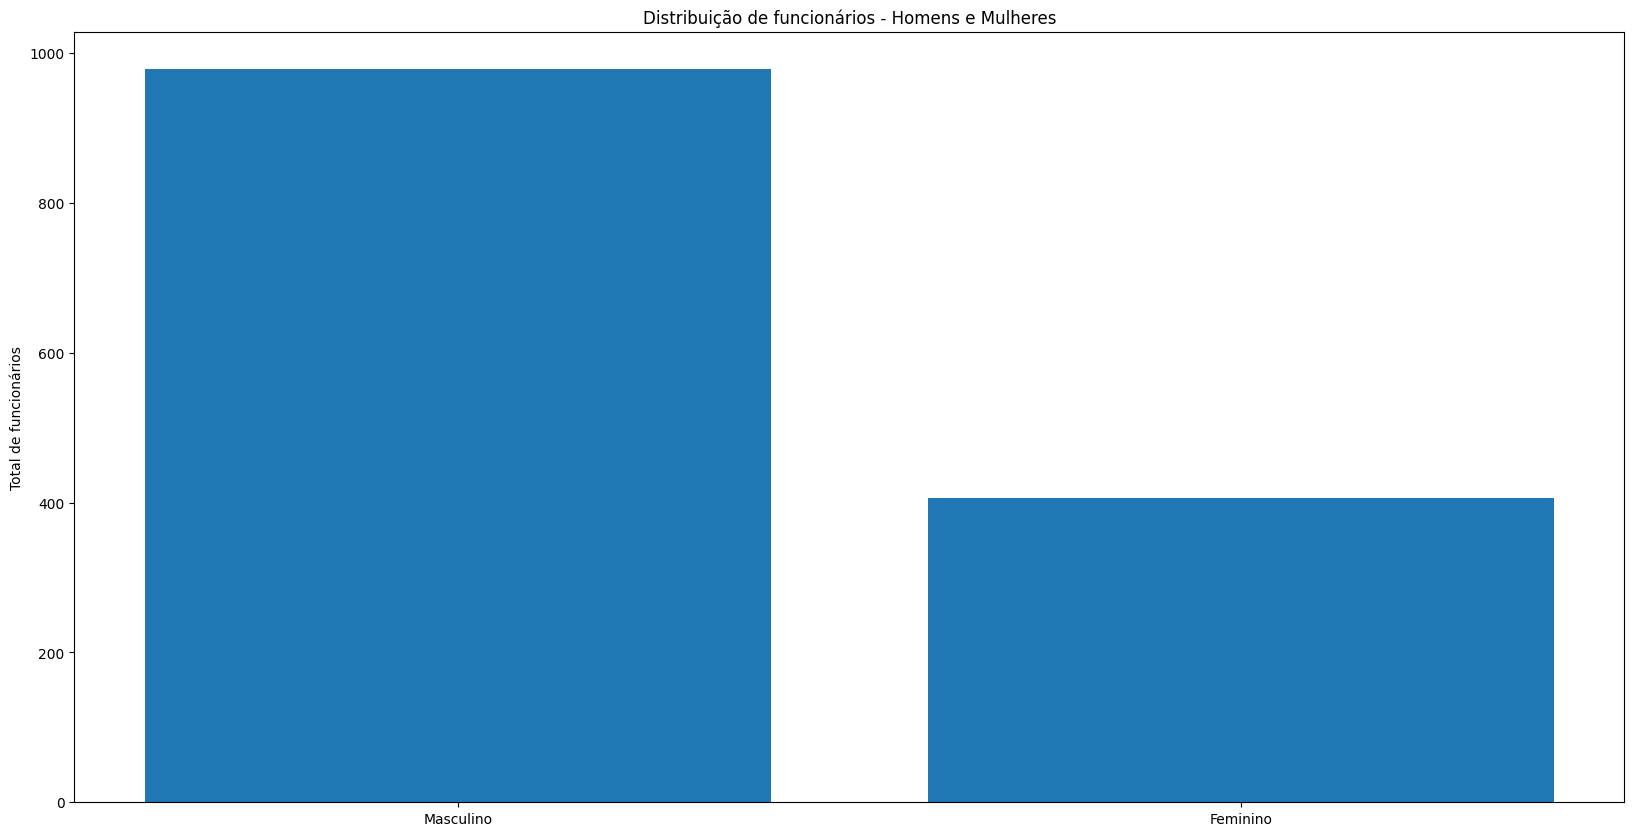

In [102]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
plt.bar(dados['Genero'].unique(), dados['Genero'].value_counts()) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de funcionários - Homens e Mulheres') # plt.title para inserir título no gráfico
plt.ylabel('Total de funcionários'); # # plt.ylabel para inserir título no gráfico

Vamos gerar esse gráfico de um jeito mais bonito

Link de palletes do seaborn: [Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette)

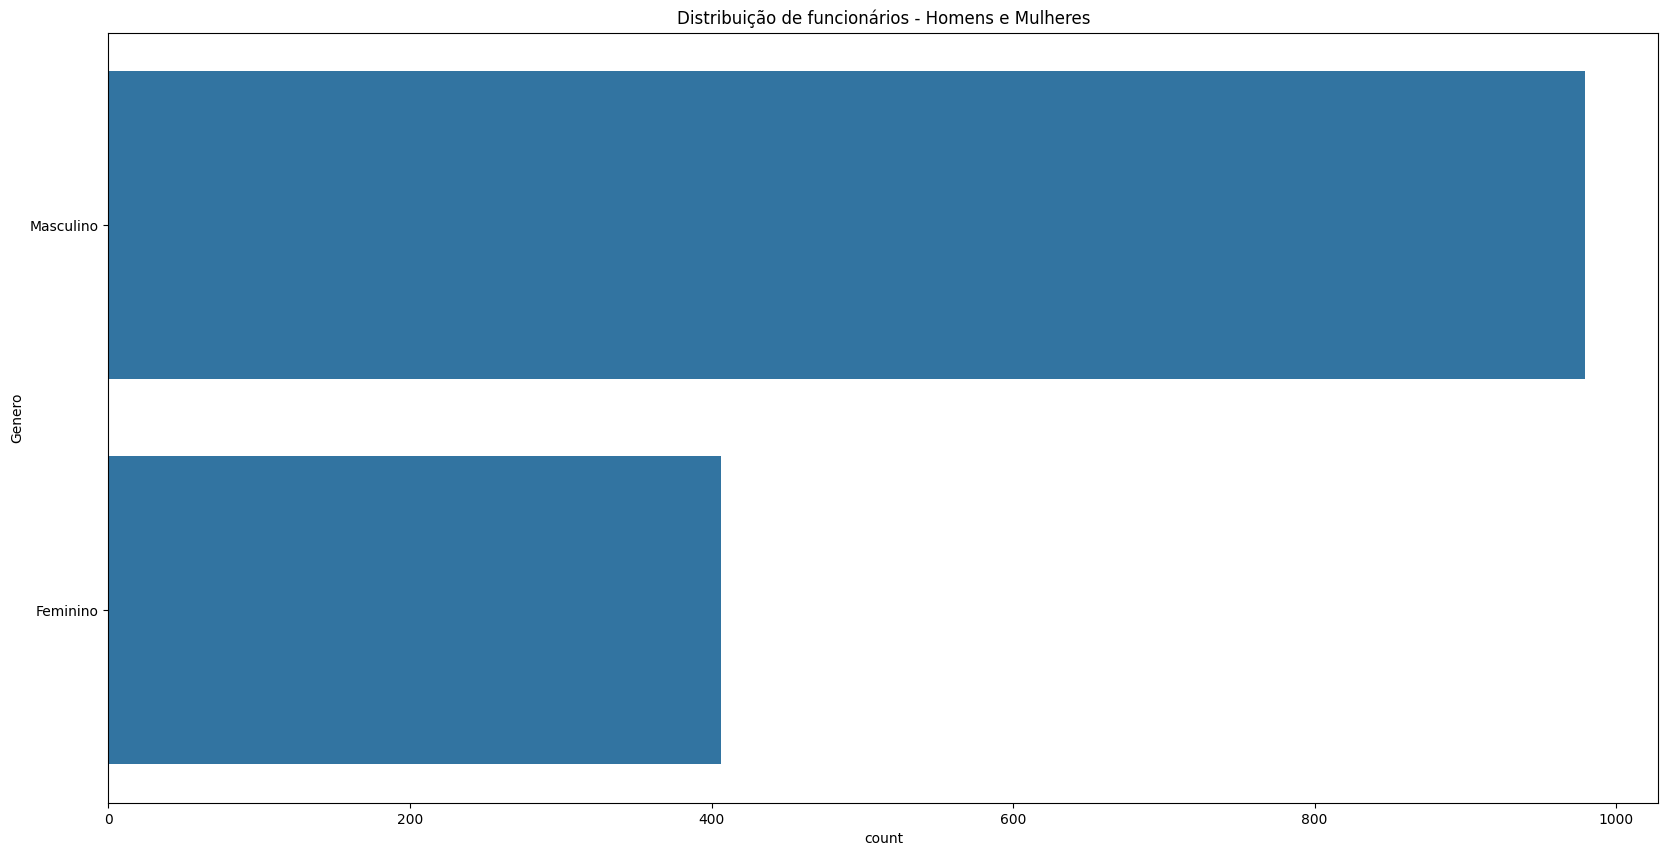

In [103]:
# Gráfico da biblioteca sns - Seaborn

# sns.countplot para criar gráfico de barras. Eixo X é a contagem (número de valores), eixo Y é a coluna de ordenação
# index para ordenar os valores
plt.figure(figsize=(20,10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index) \
.set_title("Distribuição de funcionários - Homens e Mulheres"); # set.title para inserir nome do gráfico

Agora, de acordo com o nível de formação

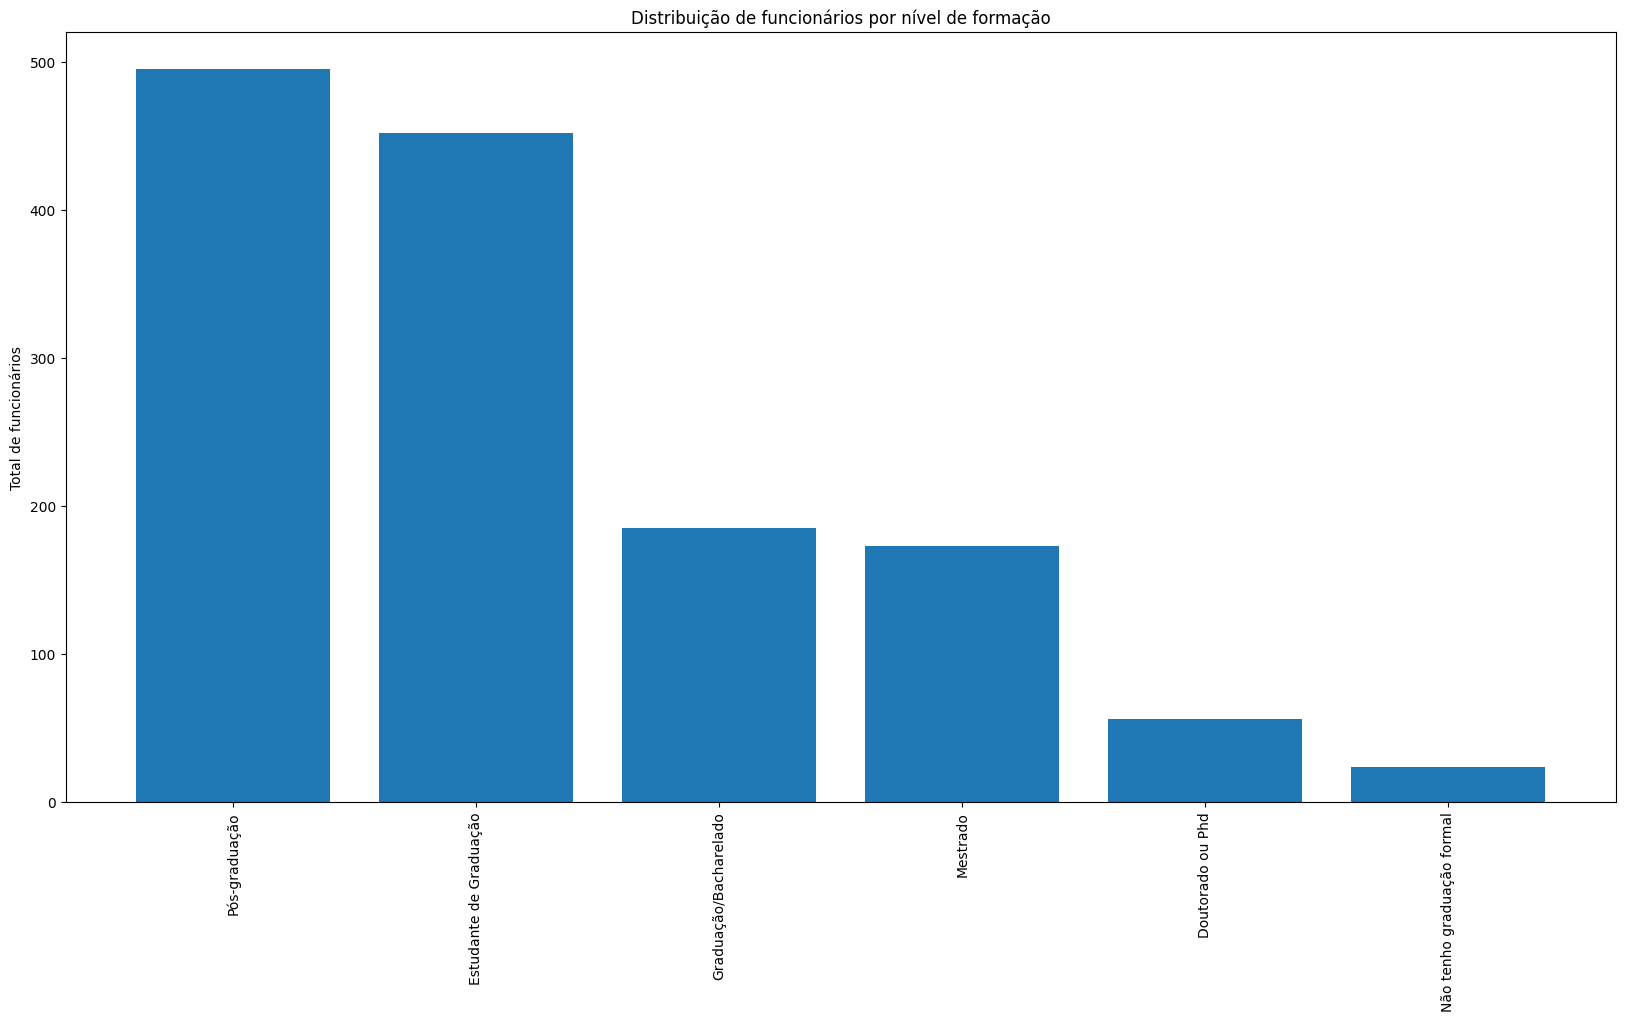

In [104]:
plt.figure(figsize=(20,10))
plt.bar(dados['Nivel Ensino'].unique(), dados['Nivel Ensino'].value_counts()) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição de funcionários por nível de formação') # Inserção do título
plt.ylabel('Total de funcionários') # Rótulo do eixo Y
plt.xticks(rotation=90); # xticks para indicar a rotação do texto no eixo X (90 graus)

Agora por nível de senioridade

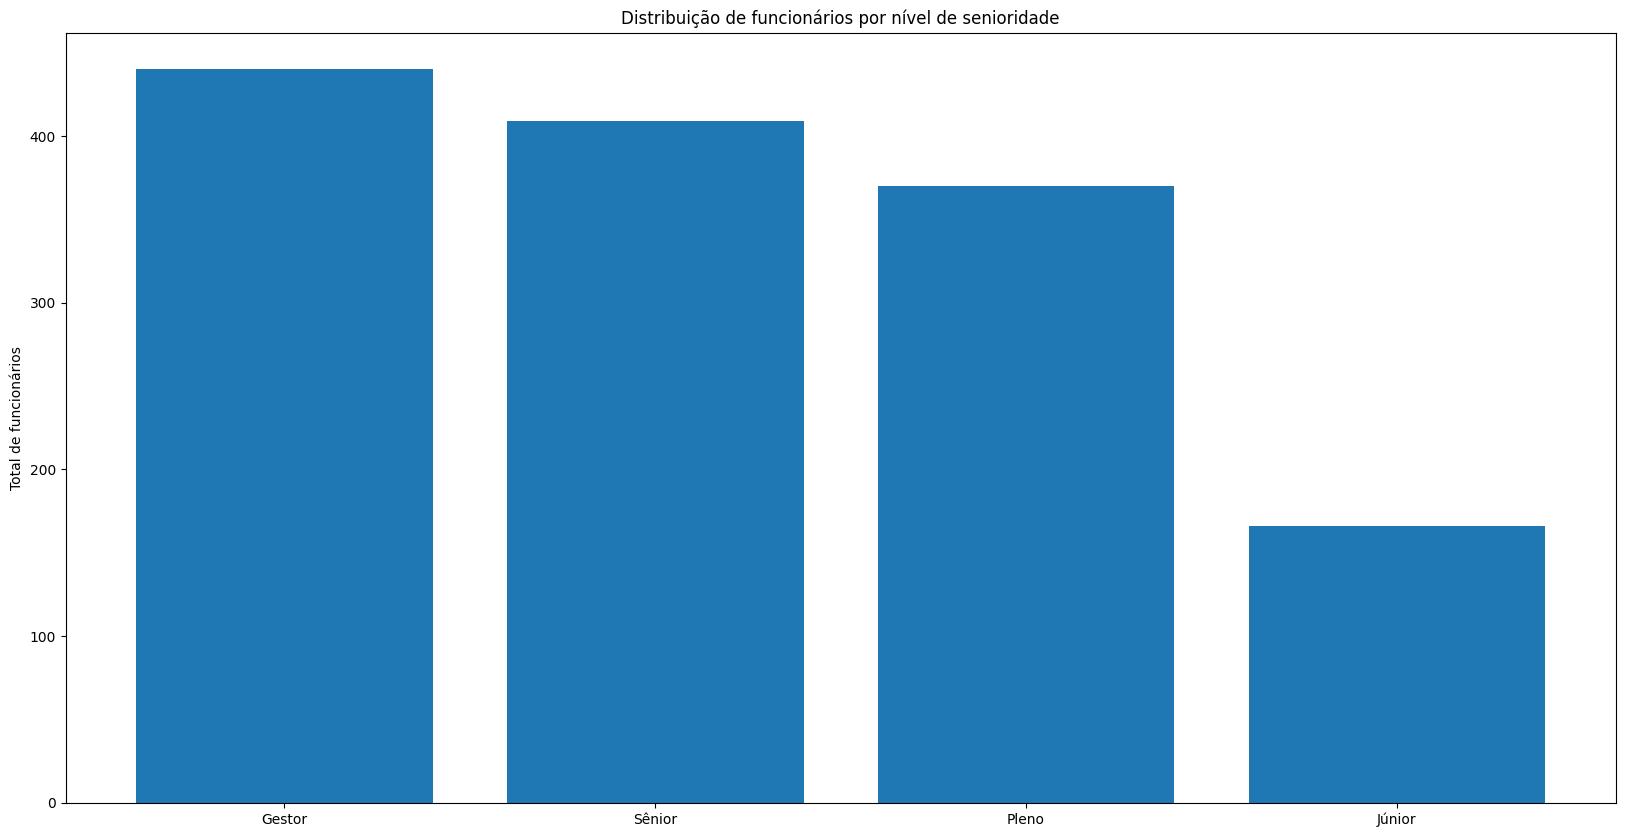

In [105]:
plt.figure(figsize=(20,10))
plt.bar(dados['Nivel'].unique(), dados['Nivel'].value_counts())
plt.title('Distribuição de funcionários por nível de senioridade')
plt.ylabel('Total de funcionários');

---
### 2. Evolução da média salarial ao longo do tempo, com base na data de último aumento

In [106]:
# Criando uma coluna somente com o ano de aumento
dados['Data ultimo aumento - Ano']=dados['Data ultimo aumento'].dt.year

In [107]:
# Transformando a coluna ano em categoria
dados['Data ultimo aumento - Ano'] = dados['Data ultimo aumento - Ano'].astype(str)
dados.dtypes

Idade                                 int64
Genero                               object
Nivel Ensino                         object
Setor                                object
Nivel                                object
Faixa Salarial                       object
Anos experiencia                     object
Faixa Salarial – numero               int64
Data ultimo aumento          datetime64[ns]
Média Salarial                      float64
Data ultimo aumento - Ano            object
dtype: object

In [108]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0) # round para arrendodar
media_salarial_ano.head()

Data ultimo aumento - Ano  Genero   
2021                       Feminino      9695.0
                           Masculino     9495.0
2022                       Feminino      9331.0
                           Masculino    11271.0
2023                       Feminino      9440.0
Name: Faixa Salarial – numero, dtype: float64

In [109]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()

,Data ultimo aumento - Ano,Genero,Salario Medio
0,2021,Feminino,9695.0
1,2021,Masculino,9495.0
2,2022,Feminino,9331.0
3,2022,Masculino,11271.0
4,2023,Feminino,9440.0


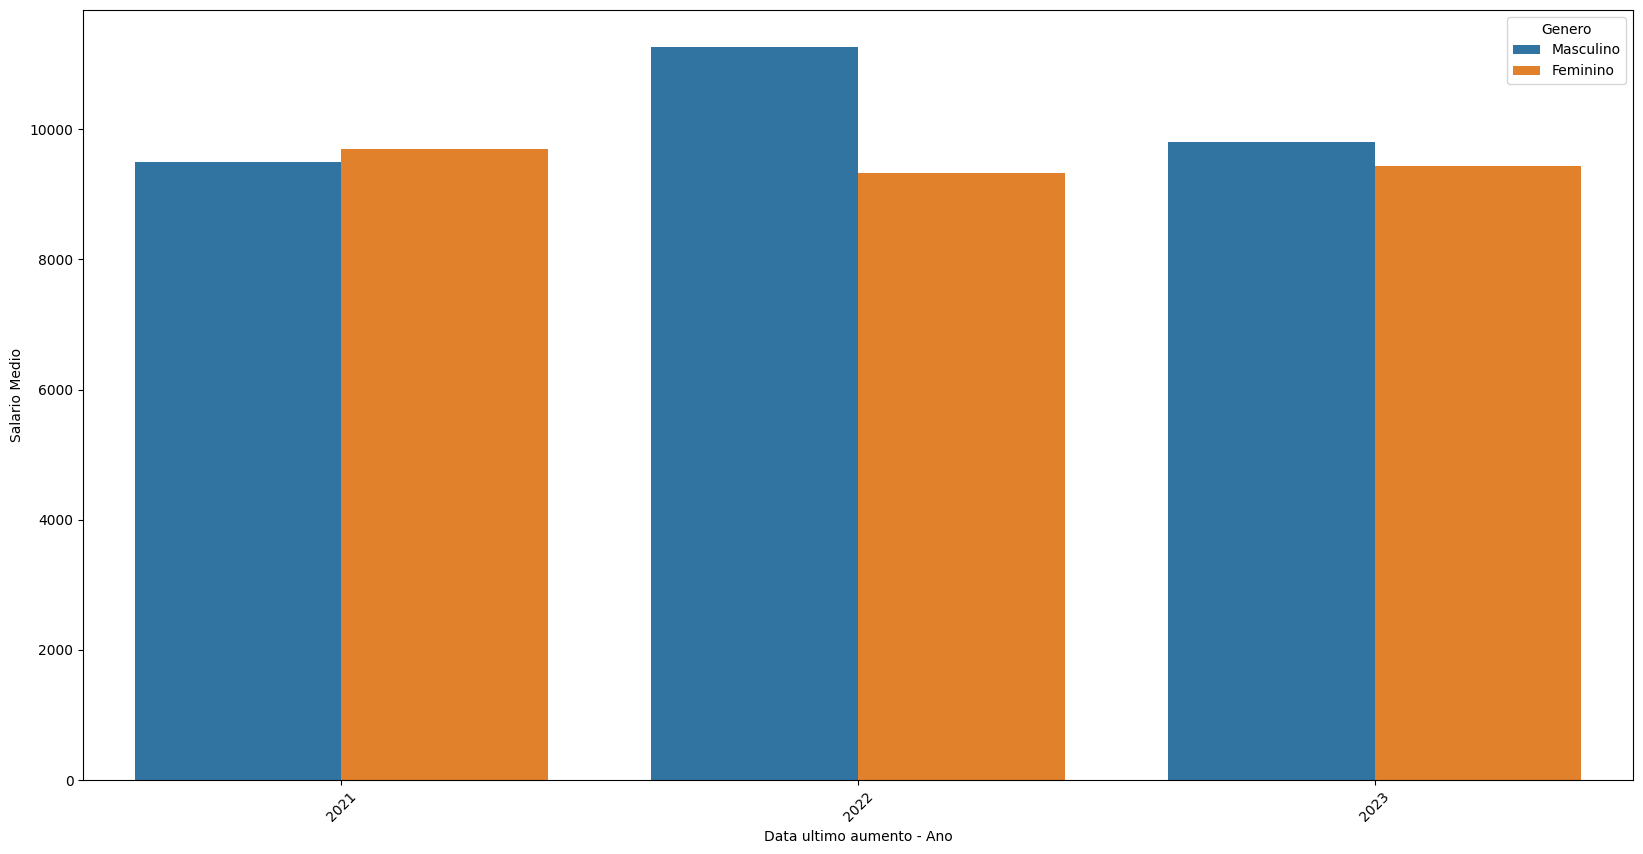

In [110]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])
plt.xticks(rotation=45);

#### Houve um aumento médio no salário dos funcionários entre 2021 e 2022. Entre 2022 e 2023, houve uma queda

---
### 3. Distribuição salarial por nível de senioridade e gênero

In [111]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()

Genero     Nivel 
Feminino   Gestor    16491.803279
           Júnior     4985.074627
           Pleno      8910.569106
           Sênior    12386.363636
Masculino  Gestor    16514.285714
Name: Faixa Salarial – numero, dtype: float64

In [112]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()

,Genero,Nivel,Salario Medio
0,Feminino,Gestor,16491.803279
1,Feminino,Júnior,4985.074627
2,Feminino,Pleno,8910.569106
3,Feminino,Sênior,12386.363636
4,Masculino,Gestor,16514.285714


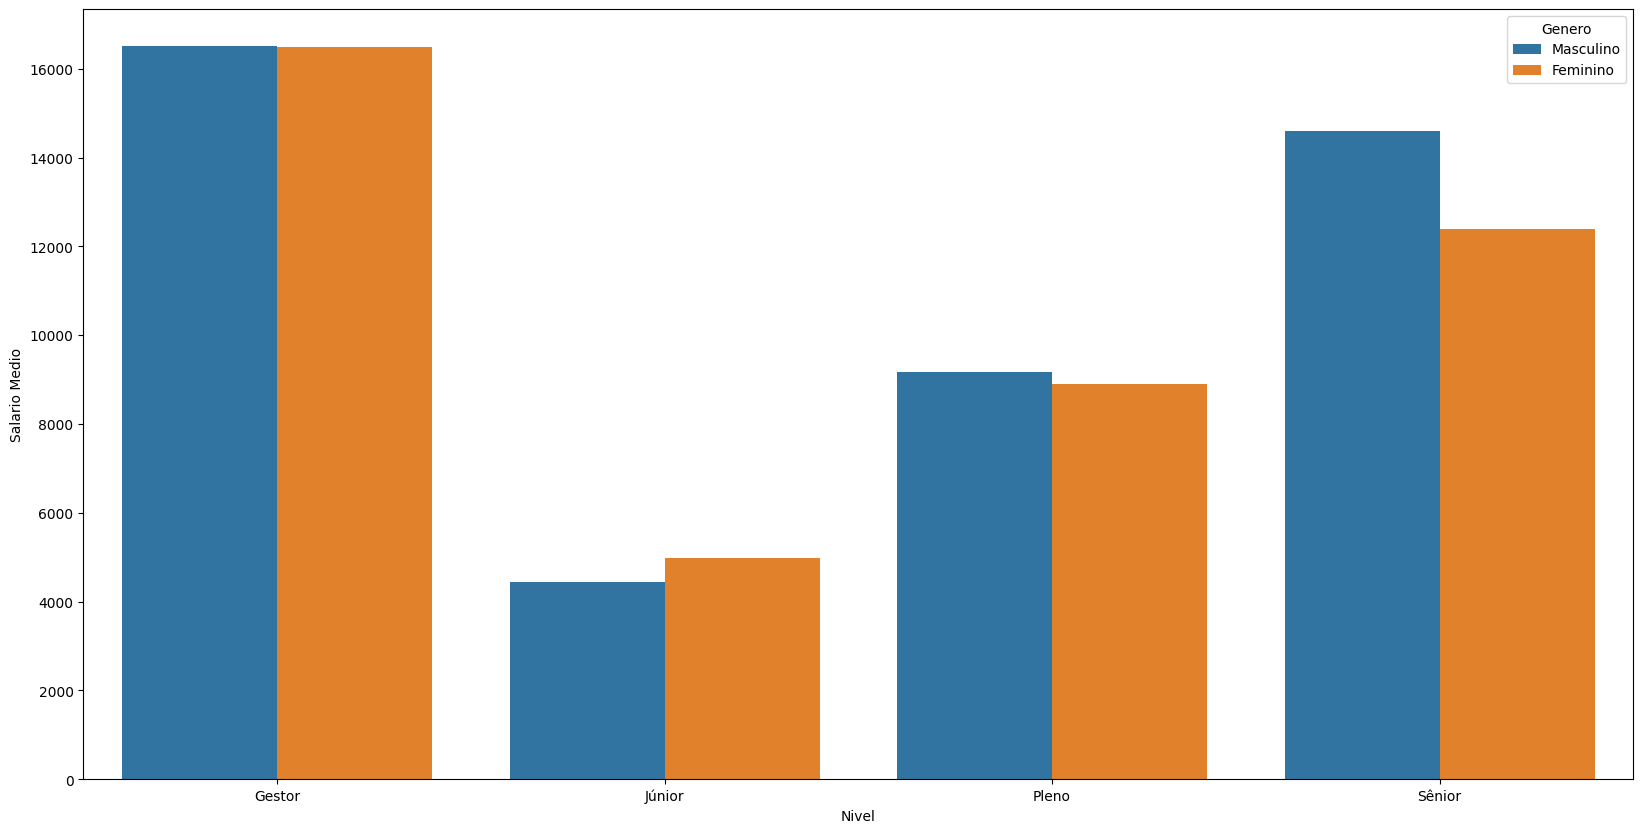

In [113]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino']);

---
### 4. Distribuição salarial por anos de experiência e gênero

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

<Axes: >

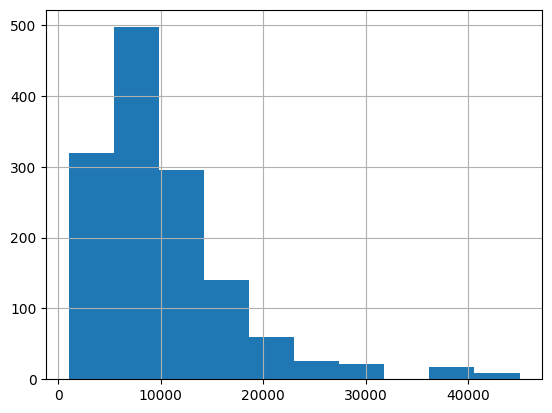

In [ ]:
dados['Faixa Salarial – numero'].hist()

In [ ]:
# Agrupamento por gênero e anos de experiência
# Cálculo da média por anos de experiência e gênero
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()

Genero    Anos experiencia
Feminino  Mais de 10 anos     15083.333333
          Menos de 1 ano       5388.888889
          de 1 a 2 anos        7540.229885
          de 2 a 3 anos        9512.195122
          de 4 a 5 anos       11685.714286
Name: Faixa Salarial – numero, dtype: float64

In [ ]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()

,Genero,Anos experiencia,Salario Medio
0,Feminino,Mais de 10 anos,15083.333333
1,Feminino,Menos de 1 ano,5388.888889
2,Feminino,de 1 a 2 anos,7540.229885
3,Feminino,de 2 a 3 anos,9512.195122
4,Feminino,de 4 a 5 anos,11685.714286


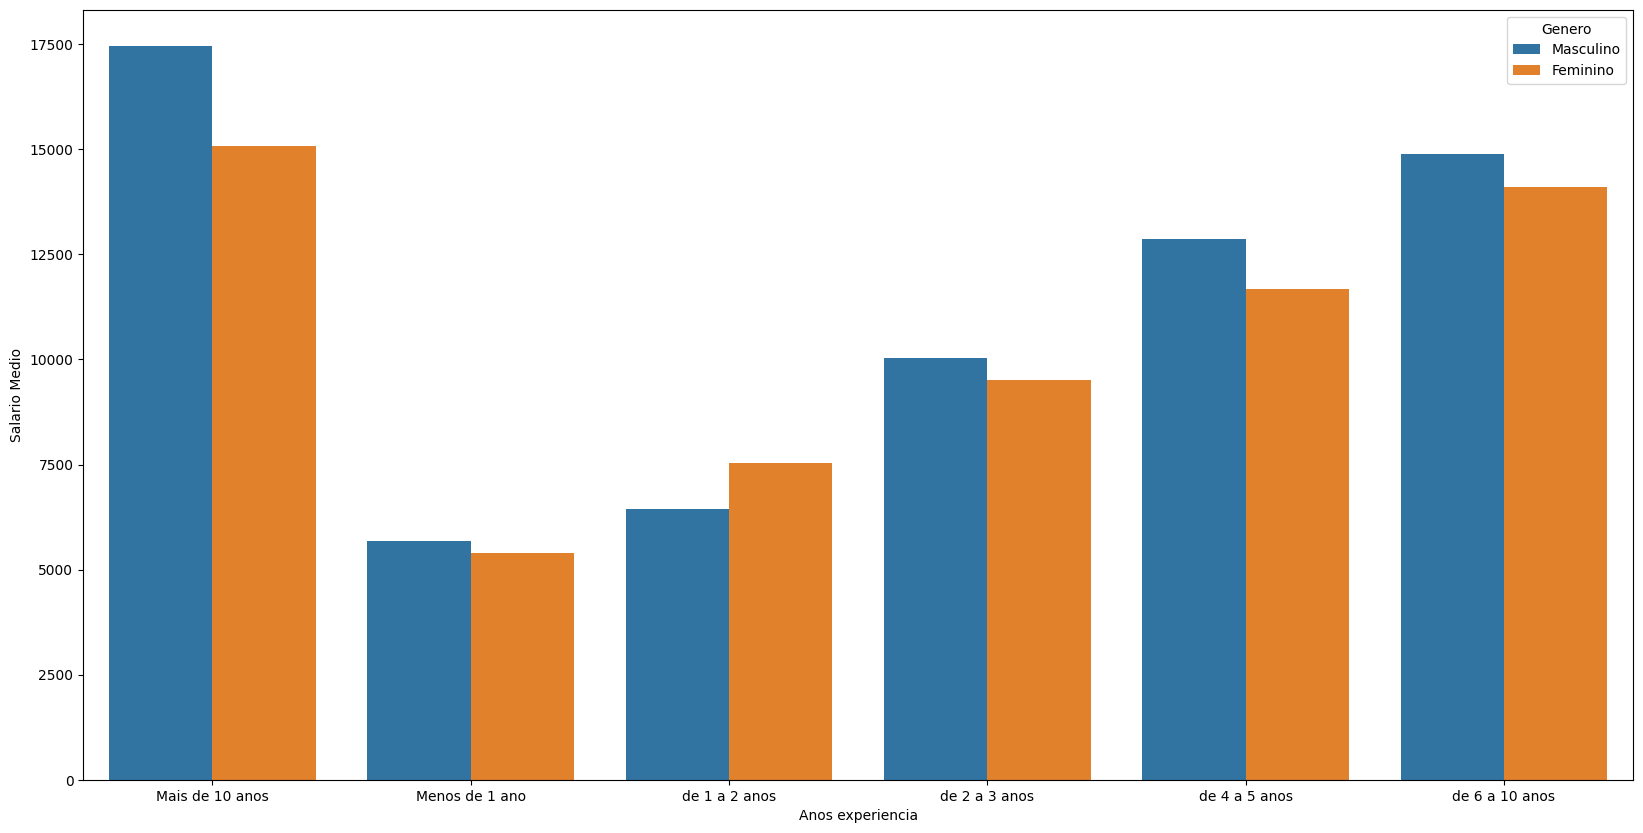

In [ ]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino']);

---
#### Fim do código
#### Obrigada!  
#### Profa. Luani R O Piva - https://www.linkedin.com/in/luanipiva/

---
# Bônus

### Análise da diferença de salário por nível de escolaridade

In [ ]:
# Agrupamento por gênero e nível de escolaridade
# Cálculo da média por nível de escolaridade e gênero
media_nivel_escolaridade = dados.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial – numero'].mean()
media_nivel_escolaridade = media_nivel_escolaridade.reset_index(name='Salario Medio')

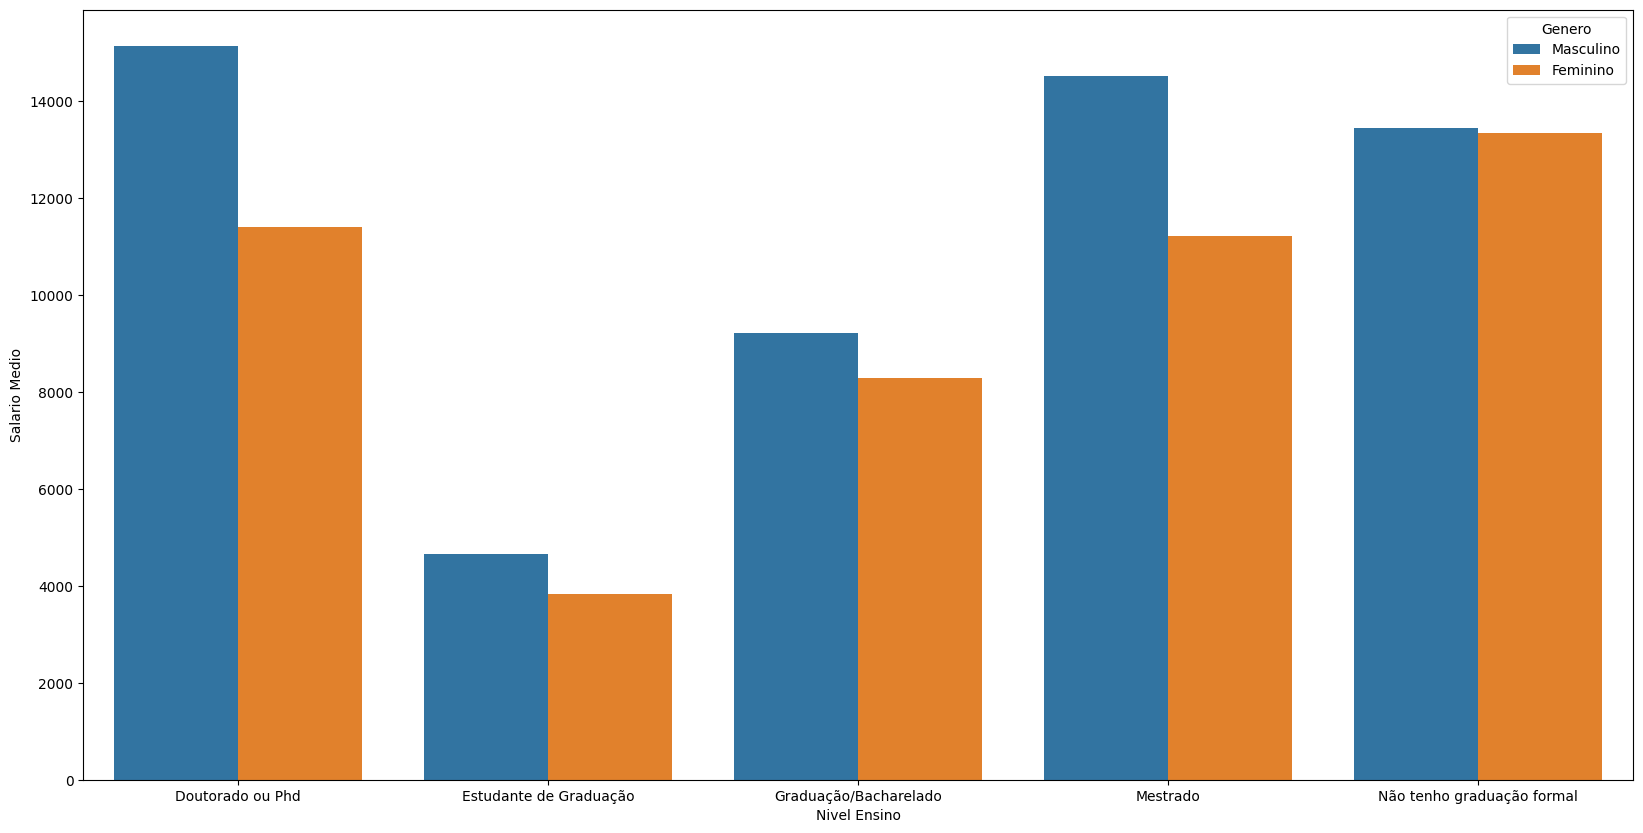

In [ ]:
# Gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=media_nivel_escolaridade,
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado','Mestrado', 'Não tenho graduação formal'], 
hue_order=['Masculino', 'Feminino']);